In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('timeseries.csv')
season = {'Winter':1,'Spring':2,'Summer':3,'Autumn':4}

In [3]:
df = df.dropna(subset=['time']) 
# print(df.tail(10))
df = df[:96431:]
# df['time'][78886]
df.index = pd.to_datetime(df['time'], format='%Y%m%d:%H%M')
df =  df.drop(["time","H_sun","T2m","WS10m","Int"], axis = 1)
# Convert G(i) to numeric, forcing errors to NaN
df['G(i)'] = pd.to_numeric(df['G(i)'], errors='coerce')

# Check for any NaN values after conversion
print("NaN values in G(i):", df['G(i)'].isna().sum())
# Filter the DataFrame to keep only rows where G(i) is greater than 0
df= df[df['G(i)'] > 10]

def get_season(month):
    if month in [12, 1, 2]:
        return season['Winter']
    elif month in [3, 4, 5]:
        return season['Spring']
    elif month in [6, 7, 8]:
        return season['Summer']
    elif month in [9, 10, 11]:
        return season['Autumn']

# Apply the function to create the season column
df['Season'] = df.index.month.map(get_season)

print(df.tail(10))

NaN values in G(i): 0
                        G(i)  Season
time                                
2020-12-31 05:07:00   406.55       1
2020-12-31 06:07:00   669.18       1
2020-12-31 07:07:00   867.56       1
2020-12-31 08:07:00  1001.58       1
2020-12-31 09:07:00  1048.06       1
2020-12-31 10:07:00  1013.41       1
2020-12-31 11:07:00   904.55       1
2020-12-31 12:07:00   721.79       1
2020-12-31 13:07:00   486.98       1
2020-12-31 14:07:00   221.49       1


In [4]:
df["Seconds"] = df.index.map(pd.Timestamp.timestamp)
df

,G(i),Season,Seconds
time,,,
2010-01-01 04:07:00,91.98,1,1.262319e+09
2010-01-01 05:07:00,432.28,1,1.262322e+09
2010-01-01 06:07:00,681.34,1,1.262326e+09
2010-01-01 07:07:00,867.69,1,1.262330e+09
2010-01-01 08:07:00,987.62,1,1.262333e+09
...,...,...,...
2020-12-31 10:07:00,1013.41,1,1.609409e+09
2020-12-31 11:07:00,904.55,1,1.609413e+09
2020-12-31 12:07:00,721.79,1,1.609416e+09


In [5]:
day  = 60 * 60 * 24
year =  365.2425 * day
month = 30 * day

df ["day sin"] = np.sin(df['Seconds'] * ( 2 * np.pi /day))
df ["day cos"] = np.cos(df['Seconds'] * ( 2 * np.pi /day))
# df ["year sin"] = np.sin(df['Seconds'] * ( 2 * np.pi /year))
# df ["year cos"] = np.cos(df['Seconds'] * ( 2 * np.pi /year))

df
  

,G(i),Season,Seconds,day sin,day cos
time,,,,,
2010-01-01 04:07:00,91.98,1,1.262319e+09,0.880891,0.473320
2010-01-01 05:07:00,432.28,1,1.262322e+09,0.973379,0.229200
2010-01-01 06:07:00,681.34,1,1.262326e+09,0.999534,-0.030539
2010-01-01 07:07:00,867.69,1,1.262330e+09,0.957571,-0.288196
2010-01-01 08:07:00,987.62,1,1.262333e+09,0.850352,-0.526214
...,...,...,...,...,...
2020-12-31 10:07:00,1013.41,1,1.609409e+09,0.473320,-0.880891
2020-12-31 11:07:00,904.55,1,1.609413e+09,0.229200,-0.973379
2020-12-31 12:07:00,721.79,1,1.609416e+09,-0.030539,-0.999534


In [6]:
df = df.drop(["Seconds"], axis = 1)
df.head(20)

,G(i),Season,day sin,day cos
time,,,,
2010-01-01 04:07:00,91.98,1,0.880891,0.473320
2010-01-01 05:07:00,432.28,1,0.973379,0.229200
2010-01-01 06:07:00,681.34,1,0.999534,-0.030539
2010-01-01 07:07:00,867.69,1,0.957571,-0.288196
2010-01-01 08:07:00,987.62,1,0.850352,-0.526214
2010-01-01 09:07:00,1034.38,1,0.685183,-0.728371
2010-01-01 10:07:00,998.94,1,0.473320,-0.880891
2010-01-01 11:07:00,887.09,1,0.229200,-0.973379
2010-01-01 12:07:00,702.60,1,-0.030539,-0.999534


In [7]:
df_multi = df.iloc[:,0:6] # removing the time column 
df.tail(30)
print(df_multi.head(10))
print(df_multi.dtypes)
# y = [x for x in df['Int'] if x == 0.0]
# print(y)b
# type(df_multi)


                        G(i)  Season   day sin   day cos
time                                                    
2010-01-01 04:07:00    91.98       1  0.880891  0.473320
2010-01-01 05:07:00   432.28       1  0.973379  0.229200
2010-01-01 06:07:00   681.34       1  0.999534 -0.030539
2010-01-01 07:07:00   867.69       1  0.957571 -0.288196
2010-01-01 08:07:00   987.62       1  0.850352 -0.526214
2010-01-01 09:07:00  1034.38       1  0.685183 -0.728371
2010-01-01 10:07:00   998.94       1  0.473320 -0.880891
2010-01-01 11:07:00   887.09       1  0.229200 -0.973379
2010-01-01 12:07:00   702.60       1 -0.030539 -0.999534
2010-01-01 13:07:00   472.43       1 -0.288196 -0.957571
G(i)       float64
Season       int64
day sin    float64
day cos    float64
dtype: object


In [8]:
df_winter = df_multi[df_multi['Season'] == 1]
df_spring = df_multi[df_multi['Season'] == 2]
df_summer = df_multi[df_multi['Season'] == 3]
df_fall = df_multi[df_multi['Season'] == 4]
df_scaled = df_multi.to_numpy()
df_scaled_winter = df_winter.to_numpy()
df_scaled_spring = df_spring.to_numpy()
df_scaled_summer = df_summer.to_numpy()
df_scaled_fall = df_fall.to_numpy()
df_summer

,G(i),Season,day sin,day cos
time,,,,
2010-06-01 04:07:00,151.13,3,0.880891,0.473320
2010-06-01 05:07:00,399.73,3,0.973379,0.229200
2010-06-01 06:07:00,609.49,3,0.999534,-0.030539
2010-06-01 07:07:00,781.45,3,0.957571,-0.288196
2010-06-01 08:07:00,897.84,3,0.850352,-0.526214
...,...,...,...,...
2020-08-31 11:07:00,272.20,3,0.229200,-0.973379
2020-08-31 12:07:00,200.26,3,-0.030539,-0.999534
2020-08-31 13:07:00,100.13,3,-0.288196,-0.957571


In [9]:
print(df_scaled[0:5,:]) # this it the input
print(df_scaled[5,:]) # this is the output

[[ 9.19800000e+01  1.00000000e+00  8.80890738e-01  4.73319667e-01]
 [ 4.32280000e+02  1.00000000e+00  9.73379258e-01  2.29200391e-01]
 [ 6.81340000e+02  1.00000000e+00  9.99533591e-01 -3.05385132e-02]
 [ 8.67690000e+02  1.00000000e+00  9.57571361e-01 -2.88196268e-01]
 [ 9.87620000e+02  1.00000000e+00  8.50352225e-01 -5.26213924e-01]]
[ 1.0343800e+03  1.0000000e+00  6.8518299e-01 -7.2837097e-01]


In [10]:
def df_to_X_y(df_as_np, window_size=5):
#   df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [a for a in df_as_np[i:i+window_size,:]]
    X.append(row)
    label = df_as_np[i+window_size,0]
    y.append(label)
  return np.array(X), np.array(y)

In [11]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(df_scaled, WINDOW_SIZE)
X_winter, y_winter = df_to_X_y(df_scaled_winter, WINDOW_SIZE)
X_spring, y_spring = df_to_X_y(df_scaled_spring, WINDOW_SIZE)
X_summer, y_summer = df_to_X_y(df_scaled_summer, WINDOW_SIZE)
X_fall, y_fall = df_to_X_y(df_scaled_fall, WINDOW_SIZE)
X1, y1 = df_to_X_y(df_scaled, WINDOW_SIZE)

#################################


NameError: name 'X_train1' is not defined

array([[[-1.368702  ,  1.        ,  0.88089074,  0.47331967],
        [-0.38148004,  1.        ,  0.97337926,  0.22920039],
        [ 0.34105156,  1.        ,  0.99953359, -0.03053851],
        [ 0.8816593 ,  1.        ,  0.95757136, -0.28819627],
        [ 1.22958034,  1.        ,  0.85035222, -0.52621392]],

       [[-0.38148004,  1.        ,  0.97337926,  0.22920039],
        [ 0.34105156,  1.        ,  0.99953359, -0.03053851],
        [ 0.8816593 ,  1.        ,  0.95757136, -0.28819627],
        [ 1.22958034,  1.        ,  0.85035222, -0.52621392],
        [ 1.36523271,  1.        ,  0.68518299, -0.72837097]],

       [[ 0.34105156,  1.        ,  0.99953359, -0.03053851],
        [ 0.8816593 ,  1.        ,  0.95757136, -0.28819627],
        [ 1.22958034,  1.        ,  0.85035222, -0.52621392],
        [ 1.36523271,  1.        ,  0.68518299, -0.72837097],
        [ 1.26242005,  1.        ,  0.47331967, -0.88089074]],

       ...,

       [[ 0.88128217,  1.        ,  0.95757136, -0.

In [13]:
X_train1, y_train1 = X1[:30684], y1[:30684]
X_val1, y_val1 = X1[30685:35064], y1[30685:35064] # 1 year for validation [61,367 , 70127]
X_test1, y_test1 = X1[35065:], y1[35065:] #  1 year testing [70,128 , 78887]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape


((30684, 5, 4), (30684,), (4379, 5, 4), (4379,), (11117, 5, 4), (11117,))

In [14]:
X_train1[:,:,0]

array([[  91.98,  432.28,  681.34,  867.69,  987.62],
       [ 432.28,  681.34,  867.69,  987.62, 1034.38],
       [ 681.34,  867.69,  987.62, 1034.38,  998.94],
       ...,
       [ 678.16,  861.13,  977.8 , 1017.07,  979.4 ],
       [ 861.13,  977.8 , 1017.07,  979.4 ,  865.01],
       [ 977.8 , 1017.07,  979.4 ,  865.01,  686.17]])

In [15]:
print(np.mean(X_train1[:,:,0]))
np.std((X_train1[:,:,0]))
#  91.98, => -0.48
# 432.28 =>0.44

563.7779415330465


344.7046475623247

In [16]:
g_training_mean = np.mean( X_train1[ : ,: ,0])
g_training_std = np.std( X_train1[ : ,: ,0])
def preprocess(X):
    X[:,:,0] = (X[:,:,0] - g_training_mean)/ g_training_std
    return X


In [17]:
preprocess(X_train1)
preprocess(X_val1)
preprocess(X_test1)
preprocess(X_winter)
preprocess(X_summer)
preprocess(X_spring)
preprocess(X_fall)



array([[[-1.55094498,  4.        ,  0.88089074,  0.47331967],
        [-1.09675905,  4.        ,  0.97337926,  0.22920039],
        [-0.93995815,  4.        ,  0.99953359, -0.03053851],
        [-0.09297218,  4.        ,  0.95757136, -0.28819627],
        [-0.10855073,  4.        ,  0.85035223, -0.52621392]],

       [[-1.09675905,  4.        ,  0.97337926,  0.22920039],
        [-0.93995815,  4.        ,  0.99953359, -0.03053851],
        [-0.09297218,  4.        ,  0.95757136, -0.28819627],
        [-0.10855073,  4.        ,  0.85035223, -0.52621392],
        [ 0.0660045 ,  4.        ,  0.68518299, -0.72837097]],

       [[-0.93995815,  4.        ,  0.99953359, -0.03053851],
        [-0.09297218,  4.        ,  0.95757136, -0.28819627],
        [-0.10855073,  4.        ,  0.85035223, -0.52621392],
        [ 0.0660045 ,  4.        ,  0.68518299, -0.72837097],
        [ 0.10740226,  4.        ,  0.47331967, -0.88089074]],

       ...,

       [[ 0.9237243 ,  4.        ,  0.95757136, -0.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 4)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17664     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,193
Trainable params: 18,193
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=1, mode='min')

In [21]:
cp1 = ModelCheckpoint('model_G(I)_TIME/', save_best_only=True)
# metrics , learning rate, loss  can be changed 
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
print(X_train1)

[[[-1.368702    1.          0.88089074  0.47331967]
  [-0.38148004  1.          0.97337926  0.22920039]
  [ 0.34105156  1.          0.99953359 -0.03053851]
  [ 0.8816593   1.          0.95757136 -0.28819627]
  [ 1.22958034  1.          0.85035222 -0.52621392]]

 [[-0.38148004  1.          0.97337926  0.22920039]
  [ 0.34105156  1.          0.99953359 -0.03053851]
  [ 0.8816593   1.          0.95757136 -0.28819627]
  [ 1.22958034  1.          0.85035222 -0.52621392]
  [ 1.36523271  1.          0.68518299 -0.72837097]]

 [[ 0.34105156  1.          0.99953359 -0.03053851]
  [ 0.8816593   1.          0.95757136 -0.28819627]
  [ 1.22958034  1.          0.85035222 -0.52621392]
  [ 1.36523271  1.          0.68518299 -0.72837097]
  [ 1.26242005  1.          0.47331967 -0.88089074]]

 ...

 [[ 0.33182627  2.          0.99953359 -0.03053851]
  [ 0.86262852  2.          0.95757136 -0.28819627]
  [ 1.20109219  2.          0.85035223 -0.52621392]
  [ 1.3150158   2.          0.68518299 -0.72837097]


In [34]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, callbacks=[cp1,early_stopping])

Epoch 1/50
959/959 [==============================] - 6s 4ms/step - loss: 28780.4238 - root_mean_squared_error: 169.6479 - val_loss: 22970.0117 - val_root_mean_squared_error: 151.5586
Epoch 2/50
959/959 [==============================] - 3s 3ms/step - loss: 21461.6758 - root_mean_squared_error: 146.4980 - val_loss: 20287.9316 - val_root_mean_squared_error: 142.4357
Epoch 3/50
959/959 [==============================] - 4s 4ms/step - loss: 19879.3184 - root_mean_squared_error: 140.9940 - val_loss: 19836.1133 - val_root_mean_squared_error: 140.8407
Epoch 4/50
959/959 [==============================] - 3s 4ms/step - loss: 19258.0918 - root_mean_squared_error: 138.7735 - val_loss: 19067.9062 - val_root_mean_squared_error: 138.0866
Epoch 5/50
959/959 [==============================] - 4s 4ms/step - loss: 18983.7812 - root_mean_squared_error: 137.7816 - val_loss: 19289.7480 - val_root_mean_squared_error: 138.8875
Epoch 6/50
959/959 [==============================] - 3s 3ms/step - loss: 18859.

In [19]:
from tensorflow.keras.models import load_model
model1 = load_model('model_G(I)_TIME/')

350/350 [==============================] - 1s 3ms/step


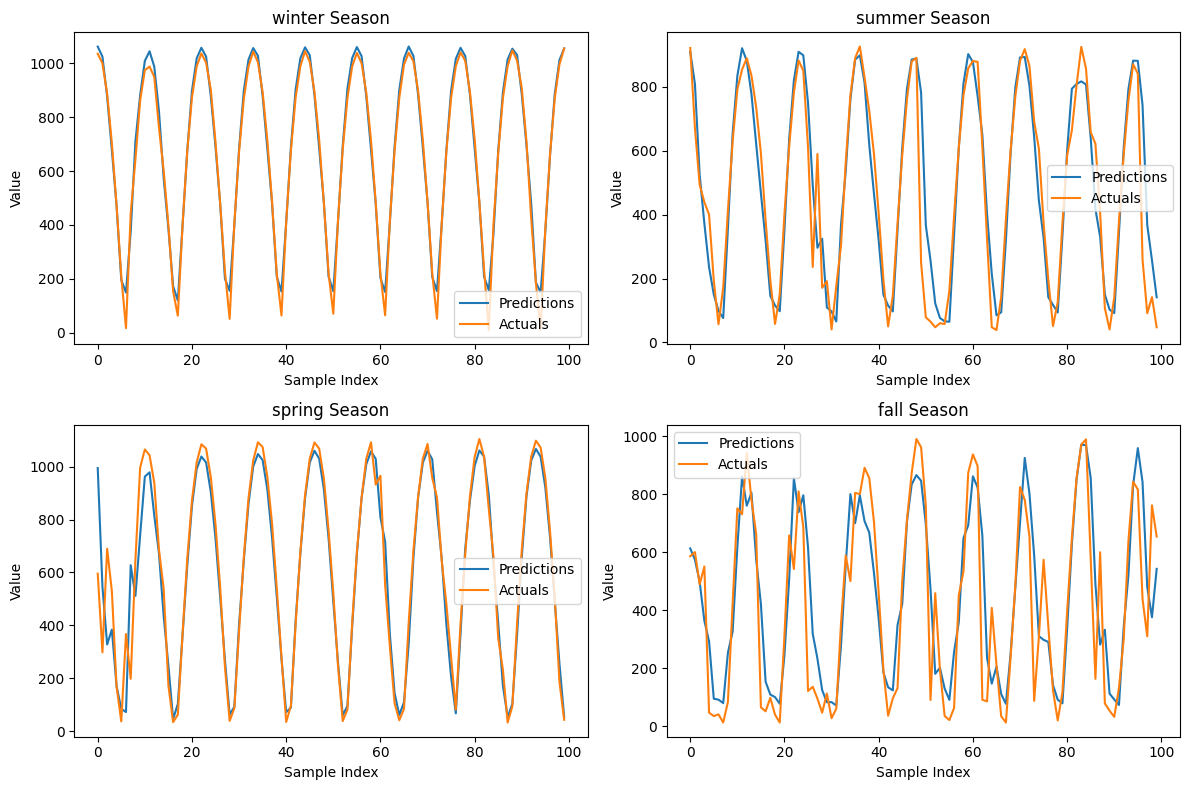

In [22]:

season_list_x = [X_winter, X_summer, X_spring,X_fall] 
season_list_y = [y_winter, y_summer, y_spring,y_fall] 
season_names = ["winter","summer","spring","fall"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()  

for idx, (i, j) in enumerate(zip(season_list_x, season_list_y)):
    train_predictions = model1.predict(i).flatten()
    train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':j.flatten()})
    ax = axes[idx]
    ax.plot(train_results['Train Predictions'][0:100], label='Predictions')
    ax.plot(train_results['Actuals'][0:100], label='Actuals')
    ax.set_title(f"{season_names[idx]} Season")
    ax.legend()
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Value')


plt.tight_layout()
plt.show()
    
    
        

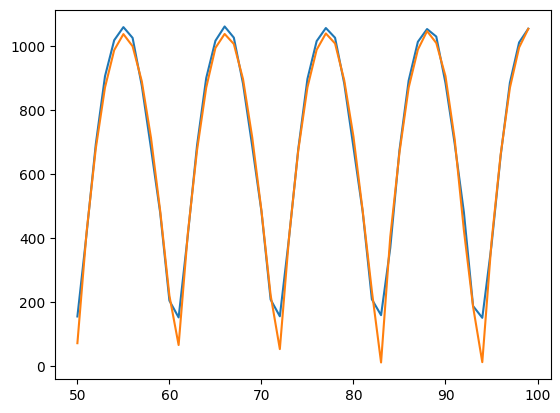

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [203]:

val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1.flatten()})
val_results.head(20)

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


,Val Predictions,Actuals
0,49.079227,18.99
1,150.470932,183.93
2,453.505066,439.60
3,683.348145,673.19
4,865.072571,851.40
5,968.329895,971.12
6,995.188171,1004.29
7,936.419617,967.20
8,807.293762,819.04
9,595.927307,39.86


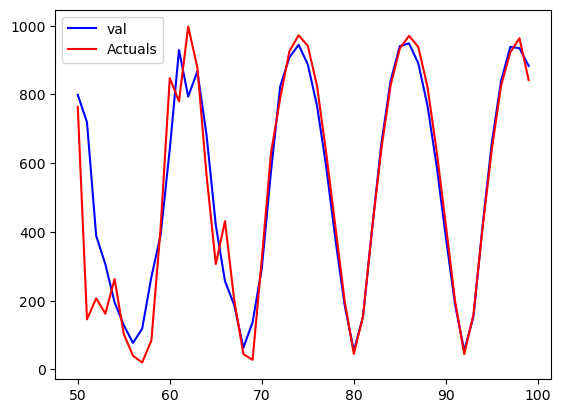

In [204]:
plt.plot(val_results['Val Predictions'][50:100],label="val", color="blue")
plt.plot(val_results['Actuals'][50:100],label="Actuals", color="red")
plt.legend()

In [205]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1.flatten()})
test_results

348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


,Test Predictions,Actuals
0,154.959412,162.85
1,424.775635,405.39
2,653.707458,621.45
3,823.672546,817.07
4,927.717041,935.12
...,...,...
11112,1011.276306,1013.41
11113,885.278137,904.55
11114,708.673035,721.79
11115,484.448364,486.98


In [206]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=50, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(predictions, y)

348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


(       Predictions  Actuals
 0       154.959412   162.85
 1       424.775635   405.39
 2       653.707458   621.45
 3       823.672546   817.07
 4       927.717041   935.12
 ...            ...      ...
 11112  1011.276306  1013.41
 11113   885.278137   904.55
 11114   708.673035   721.79
 11115   484.448364   486.98
 11116   211.319107   221.49
 
 [11117 rows x 2 columns],
 11949.006008424427)

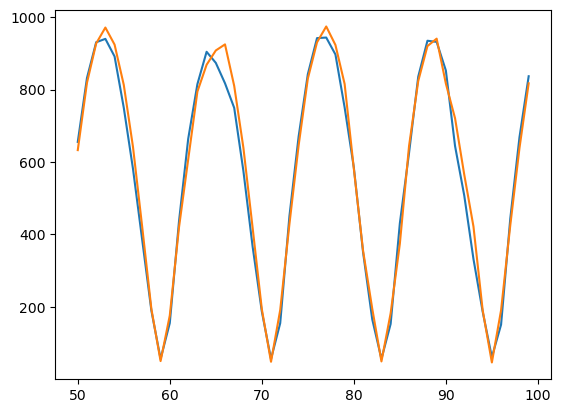

In [207]:
plot_predictions1(model1, X_test1, y_test1.flatten())

In [208]:
df_multi.iloc[39445:39460,:]

,G(i),Season,day sin,day cos
time,,,,
2019-05-27 05:07:00,417.33,2,0.973379,0.229200
2019-05-27 06:07:00,628.78,2,0.999534,-0.030539
2019-05-27 07:07:00,802.50,2,0.957571,-0.288196
2019-05-27 08:07:00,906.28,2,0.850352,-0.526214
2019-05-27 09:07:00,940.33,2,0.685183,-0.728371
2019-05-27 10:07:00,895.97,2,0.473320,-0.880891
2019-05-27 11:07:00,778.81,2,0.229200,-0.973379
2019-05-27 12:07:00,445.30,2,-0.030539,-0.999534
2019-05-27 13:07:00,182.43,2,-0.288196,-0.957571


In [212]:
kkk = df_multi.iloc[39445:39450,:]
time = str(df_multi.index[39445])
print(time)
print(type(kkk))
print(kkk.shape)
reshaped_array = np.reshape(kkk.to_numpy(), (1, 5, 4))
preprocess(reshaped_array)
print(reshaped_array)
predictions = model1.predict(reshaped_array)
print(predictions[0][0])

2019-05-27 05:07:00
<class 'pandas.core.frame.DataFrame'>
(5, 4)
[[[-0.4248505   2.          0.97337926  0.22920039]
  [ 0.1885732   2.          0.99953359 -0.03053851]
  [ 0.69254088  2.          0.95757136 -0.28819627]
  [ 0.99361021  2.          0.85035222 -0.52621392]
  [ 1.09239043  2.          0.68518299 -0.72837097]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
854.4682


In [35]:
from datetime import datetime, timedelta

def get_next_24_hours_from_datetime(start_datetime_str):
    """
    Generate a list of strings representing the datetime for the next 24 hours,
    given the start datetime in the format "YYYY-MM-DD HH:MM:SS".

    Parameters:
    - start_datetime_str (str): The starting datetime in the format "YYYY-MM-DD HH:MM:SS".

    Returns:
    - list of strings: Each string contains the datetime for the next 24 hours in the format "YYYY-MM-DD HH:MM:SS".
    """
    # Convert the input string to a datetime object
    start_datetime = datetime.strptime(start_datetime_str, "%Y-%m-%d %H:%M:%S")

    # Initialize a list to hold the future datetimes in the desired format
    future_datetimes_formatted = []
    day_sin= []
    day_cos= []

    # Calculate and format the next 24 hours
    for i in range(2, 26):  # Start from 1 to include the next hour immediately
        future_datetime = start_datetime + timedelta(hours=i)
        timeStamp = future_datetime.timestamp()
        day_sin_ = np.sin(timeStamp * ( 2 * np.pi /day))
        day_cos_ = np.cos(timeStamp * ( 2 * np.pi /day))
        day_sin.append(day_sin_)
        day_cos.append(day_cos_)
        
    return day_cos,day_sin


In [36]:
day_cos, day_sin = get_next_24_hours_from_datetime(time)

In [38]:

input = df_scaled[78885:78890,:]  # Initial input extracted from your original scaled DataFrame
output_scaled = []  
output_not_scaled = [] 

for i in range(24):
    # Reshape input for the model prediction
    reshaped_array = np.reshape(input, (1, 5, 3))
    preprocess(reshaped_array)
    prediction = []
    prediction.append( model1.predict(reshaped_array)[0][0])
    prediction.append(day_sin[i])
    prediction.append(day_cos[i])
    
    
    
    # Reshape the prediction to match the input shape if necessary
    # Adjust the reshaping based on the actual shape of your model's output
    prediction_reshaped = np.reshape(prediction, (1, 3))
    input = np.reshape(input, (5, 3))  # Ensure input is in the correct shape before appending
    # Append the new prediction at the end of the input array
    input = np.vstack([input, prediction_reshaped])  # Stack vertically to add as a new row
    
    # Remove the oldest entry to maintain the sliding window of input data
    input = input[1:, :]  # Keep the last 5 entries, including the newly added prediction
    
    output_scaled.append(prediction[0])


# print(output_scaled)  # Remains empty, uncomment if needed
print(output_scaled)  # Print or process the predictions as 




1/1 [==============================] - 0s 48ms/step
[-0.03995049, -0.009817481, 99.68768, 350.03638, 614.752, 835.05597, 978.7041, 915.2076, 791.64276, 688.01935, 445.7812, 254.03961, 62.512157, 0.95173085, 0.3660965, -0.04393184, -0.07812345, -0.011461735, -0.028522372, -0.040802002, -0.045092106, -0.041429043, -0.03064096, -0.021134853]


In [39]:
print("this is the real scaled output")
for i in output_scaled:
    print(i)

this is the real scaled output
-0.03995049
-0.009817481
99.68768
350.03638
614.752
835.05597
978.7041
915.2076
791.64276
688.01935
445.7812
254.03961
62.512157
0.95173085
0.3660965
-0.04393184
-0.07812345
-0.011461735
-0.028522372
-0.040802002
-0.045092106
-0.041429043
-0.03064096
-0.021134853
